In [5]:
from collections import defaultdict
import numpy as np
from scipy.sparse import csc_matrix, save_npz
import time
import gzip
from itertools import product
import sys

vcf_file = '../data/22.reheader.vcf.gz'

gen_mapping = {'./.': -1, '0/0': 0, '0|0': 0, '0/1': 1, '0|1': 1, '1/0': 1, '1|0': 1, '1/1': 2, '1|1': 2}


In [8]:

counts = np.zeros((4, 101), dtype=int)

# Pull data from vcf
with gzip.open(vcf_file, 'rt') as f:
    # Skip header
    line = next(f)
    while line.startswith('##'):
        line = next(f)

    # Pull sample_ids
    sample_ids = line.strip().split('\t')[9:]
    m = len(sample_ids)
    print('Num individuals with genomic data', m)

    # Pull genotypes/depth from vcf
    line = next(f)
    for j, line in enumerate(f):
        pieces = line.split('\t')

        # Pull out genotypes/depth
        format = pieces[8].strip().split(':')
        gen_index = format.index('GT')
        dp_index = format.index('DP')
        max_index = max(gen_index, dp_index)+1
        for i, piece in enumerate(pieces[9:]):
            segment = piece.split(':', maxsplit=max_index)

            if segment[dp_index] != '.' and segment[gen_index] in gen_mapping:
                try:
                    dp = int(segment[dp_index])
                    gt = gen_mapping[segment[gen_index]]

                    if dp > 100:
                        dp = 100
                    counts[gt, dp] += 1
                except:
                    print(format, piece)

Num individuals with genomic data 4610


KeyboardInterrupt: 

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


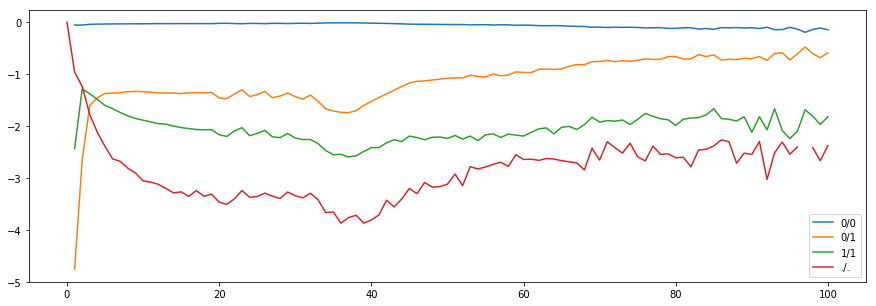

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(np.log10(counts[0, :]/np.sum(counts, axis=0)), label='0/0')
plt.plot(np.log10(counts[1, :]/np.sum(counts, axis=0)), label='0/1')
plt.plot(np.log10(counts[2, :]/np.sum(counts, axis=0)), label='1/1')
plt.plot(np.log10(counts[3, :]/np.sum(counts, axis=0)), label='./.')

plt.legend()
plt.show()

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


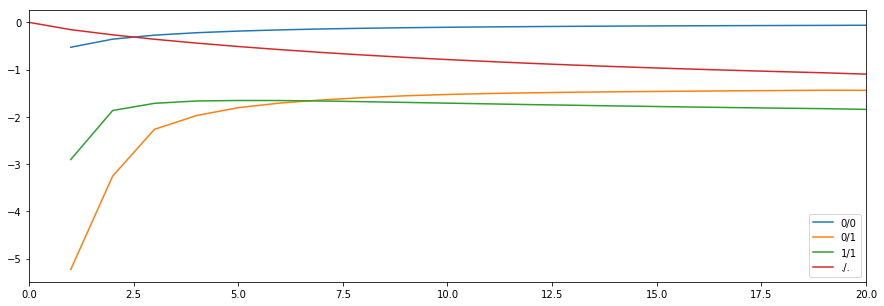

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(np.log10(np.cumsum(counts[0, :])/np.cumsum(np.sum(counts, axis=0))), label='0/0')
plt.plot(np.log10(np.cumsum(counts[1, :])/np.cumsum(np.sum(counts, axis=0))), label='0/1')
plt.plot(np.log10(np.cumsum(counts[2, :])/np.cumsum(np.sum(counts, axis=0))), label='1/1')
plt.plot(np.log10(np.cumsum(counts[3, :])/np.cumsum(np.sum(counts, axis=0))), label='./.')

plt.xlim([0, 20])
plt.legend()
plt.show()

In [21]:
print(np.log10(np.cumsum(counts[0, :])/np.cumsum(np.sum(counts, axis=0)))[:5])
print(np.log10(np.cumsum(counts[1, :])/np.cumsum(np.sum(counts, axis=0)))[:5])
print(np.log10(np.cumsum(counts[2, :])/np.cumsum(np.sum(counts, axis=0)))[:5])
print(np.log10(np.cumsum(counts[3, :])/np.cumsum(np.sum(counts, axis=0)))[:5])

[       -inf -0.52604071 -0.35545342 -0.27087144 -0.21961961]
[       -inf -5.22600411 -3.2518756  -2.26269577 -1.97177792]
[       -inf -2.90069374 -1.86409994 -1.71231628 -1.66315354]
[ 0.         -0.15433563 -0.26387749 -0.35734896 -0.43827665]


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
